In [ ]:
import numpy as np

# XOR 데이터 정의
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,1,1,0])

# 가중치와 편향 초기화
w = np.array([1.0, 1.0])
b = -1.0

# 활성함수 (Step)
def step(x):
    return 1 if x > 0 else 0

# 예측
for i in range(len(X)):
    z = np.dot(X[i], w) + b
    y_pred = step(z)
    print(f"입력: {X[i]}, 예측: {y_pred}, 정답: {y[i]}")

# 어떻게 예측하더라도 하나는 어긋날 수 밖에 없는 상황
# 예측률이 75% 에서 더이상 늘어날 수 없음


입력: [0 0], 예측: 0, 정답: 0
입력: [0 1], 예측: 0, 정답: 1
입력: [1 0], 예측: 0, 정답: 1
입력: [1 1], 예측: 1, 정답: 0


In [ ]:
!pip install koreanize-matplotlib

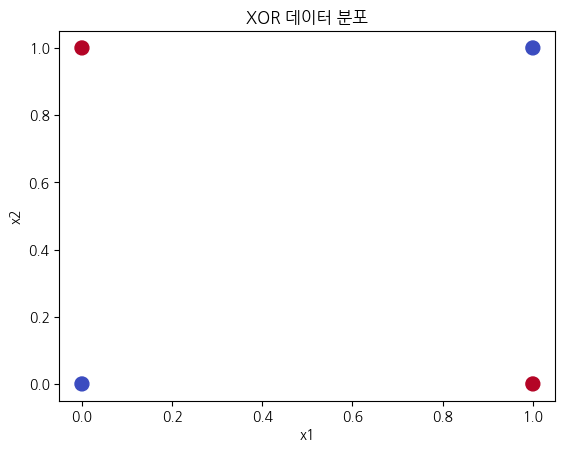

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# XOR 데이터 정의
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# 데이터 시각화
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=100)
plt.title("XOR 데이터 분포")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier

# 모델정의
model = MLPClassifier(
    hidden_layer_sizes=(2,), # 은닉층 1개, 뉴런2개
    activation='tanh', # 비선형 활성화 함수
    solver= 'adam', # 경사하강법 최적화 알고리즘
    learning_rate_init = 0.1, # 학습률
    max_iter = 1000, # 최대 100번 반복
    random_state=42 # 랜덤 시드를 고정
)

In [ ]:
# 모델 학습
model.fit(X,y)

MLPClassifier(activation='tanh', hidden_layer_sizes=(2,),
              learning_rate_init=0.1, max_iter=1000, random_state=42)

In [ ]:
# 예측
y_pred = model.predict(X)


In [ ]:
# y = no.array([0,1,1,0])
print(y_pred)

[0 1 1 0]


In [ ]:
print(model.score(X,y)) #1.0 = 정확도 100%

1.0


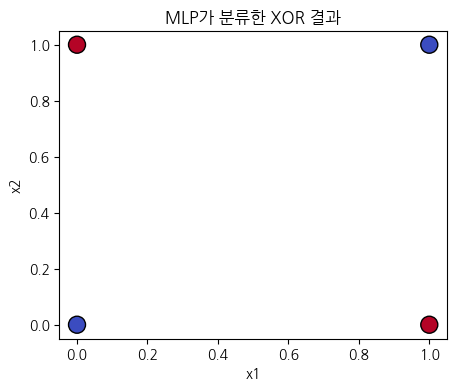

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='coolwarm', s=150, edgecolor='k')
plt.title("MLP가 분류한 XOR 결과")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [ ]:
# ===== 0. 라이브러리 =====
# 필요한 모듈 불러오기
import numpy as np
from sklearn.datasets import make_moons          # 2차원 반달형 데이터 생성
from sklearn.model_selection import train_test_split  # 학습/테스트 데이터 분할
from sklearn.preprocessing import StandardScaler      # 표준화(스케일링)
from sklearn.neural_network import MLPClassifier      # 다층 퍼셉트론(신경망 분류기)
from sklearn.pipeline import Pipeline                 # 전처리 + 모델 연결 파이프라인

# ===== 1. 데이터 준비 (샘플: 반달형 2클래스) =====
# make_moons: 반달 모양의 비선형 분류 데이터를 생성
# noise=0.25 → 약간의 랜덤 노이즈를 추가해 현실적인 분류 문제로 만듦
# random_state=42 → 결과 재현을 위해 난수 시드 고정
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


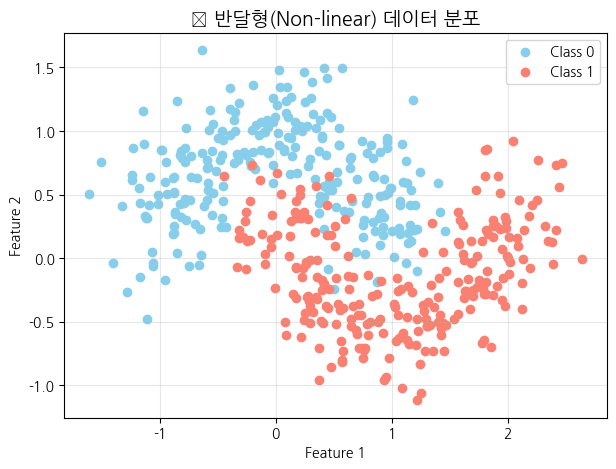

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(X[y==0, 0], X[y==0, 1], color='skyblue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='salmon', label='Class 1')
plt.title("🌙 반달형(Non-linear) 데이터 분포", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# 1.학습 / 테스트 데이터 분리

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[-0.56713789  1.16154627]
 [ 1.93376925  0.22695945]
 [ 1.81289662 -0.28000929]
 [ 0.89853941  0.48739441]
 [ 1.09667987  0.59656944]
 [-0.20044325  1.00874043]
 [-0.95555716 -0.1744581 ]
 [ 0.77710278  0.43353086]
 [ 0.69220558  0.05110117]
 [ 2.38259745  0.12359415]
 [ 1.41624915  0.36468673]
 [ 0.65894093  0.44540503]
 [-0.39286047  0.9653312 ]
 [ 1.80576017  0.85221404]
 [-0.4721457   0.24524516]
 [-1.60848958  0.50457176]
 [ 0.78257724  0.8250142 ]
 [-0.17264692  1.0468925 ]
 [-1.28100269 -0.2639486 ]
 [ 1.72960506  0.53227089]
 [ 1.15222112 -0.67452022]
 [ 0.56121105 -0.65108669]
 [-0.2231644   0.75667222]
 [ 0.91118238  0.3525296 ]
 [ 0.41699844  0.56568288]
 [ 1.57006482  0.12616156]
 [ 0.36950775  0.43141757]
 [-0.84746114  1.23861217]
 [ 1.13011736 -0.6436146 ]
 [ 1.05173834 -0.44682474]
 [ 0.17296662 -0.31699644]
 [ 1.14284775  0.11513084]
 [-0.09198516 -0.04606342]
 [-0.87746762  0.52033501]
 [ 0.893355    0.31854042]
 [ 0.75543229  0.16644386]
 [ 1.26847979 -0.37044646]
 

In [ ]:
# 2. 파이프라인 구축
# 데이터 입력 전처리 + 모델 학습

clf = Pipeline([
    ('scaler', StandardScaler()), # 표준화 StandardScaler() : 압축 / 정규화 Normalization() : 최소갑소가 최대값 사이로 최소값은 0 최대값은 1로 시그모이드함수랑 비슷한 역할
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(8,8), # 은닉층은 2개, 뉴런수는 8개
        activation='relu',
        solver='adam',
        learning_rate_init=0.01,
        max_iter=1000,
        random_state=42
      ))
])

In [ ]:
# 학습
clf.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(8, 8),
                               learning_rate_init=0.01, max_iter=1000,
                               random_state=42))])

In [ ]:
# 평가 정확도(1:1로 예측 / 0:0으로 예측을 잘 했는지)

train_acc = clf.score(x_train, y_train)
test_acc = clf.score(x_test, y_test)

In [ ]:
print(train_acc, test_acc)
# print(f"Train Accuracy: {train_acc:.3f}")
# print(f"Test Accuracy: {test_acc:.3f}")

0.955 0.94


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


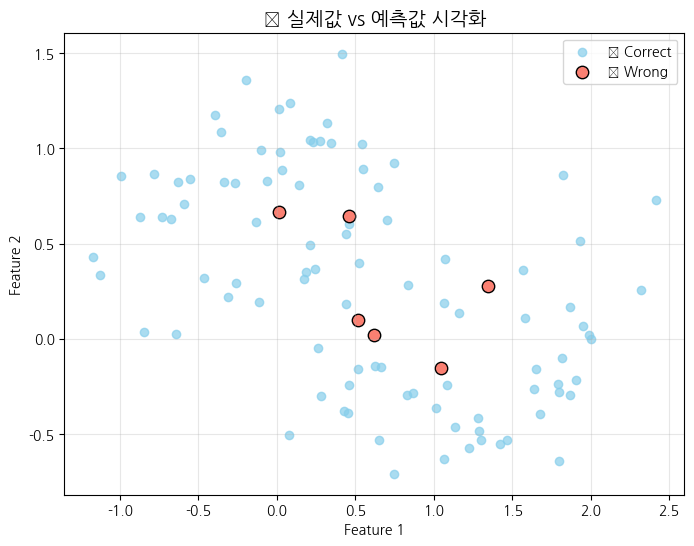

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ===== 1. 예측값 계산 =====
y_pred = clf.predict(x_test)

# ===== 2. 예측 결과 비교 (정답 vs 오답 표시) =====
plt.figure(figsize=(8,6))
plt.title("🎯 실제값 vs 예측값 시각화", fontsize=14)

# 맞게 예측한 점 (파랑)
plt.scatter(
    x_test[y_pred == y_test, 0],
    x_test[y_pred == y_test, 1],
    color="skyblue",
    label="✅ Correct",
    alpha=0.7
)

# 틀리게 예측한 점 (빨강)
plt.scatter(
    x_test[y_pred != y_test, 0],
    x_test[y_pred != y_test, 1],
    color="salmon",
    label="❌ Wrong",
    edgecolor="black",
    s=80
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# #4교시

In [ ]:
# ==============================
# 0) 라이브러리 불러오기
# ==============================
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer        # 텍스트 → 정수 인코딩
from tensorflow.keras.preprocessing.sequence import pad_sequences # 시퀀스 길이 맞추기(패딩)
from tensorflow.keras import Sequential                           # 순차적 모델 구성 클래스
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense   # 신경망 주요 레이어

# ==============================
# 1) 미니 데이터 준비
# ==============================
# 영화 리뷰 데이터(한글 간단 문장 8개)
# 1 = 긍정(Positive), 0 = 부정(Negative)
texts = [
    "이 영화 정말 재미있다",
    "배우 연기가 훌륭하다",
    "감동적인 스토리에 눈물이 났다",
    "추천하고 싶은 영화다",
    "최악이다 다시 보고 싶지 않다",
    "지루하고 시간 낭비였다",
    "스토리가 엉성하고 별로다",
    "다시는 보고 싶지 않다"
]
labels = [1, 1, 1, 1, 0, 0, 0, 0]  # 감성 레이블

In [ ]:
# 2) 토크나이징

vocab_size = 1000 # 최대 단어 수(단어 사전 크기)
maxlen = 8 # 문장의 최대 길이

# oov란? Out of vocabulary 라는 의미 -> 사전에 없는 단어 -> oov로(대체기호) 대체함
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")


In [ ]:
tokenizer.fit_on_texts(texts)# texts 데이터를 토크나이저에 넣어서



In [ ]:
seqs = tokenizer.texts_to_sequences(texts)

In [ ]:
print(seqs)

[[5, 6, 7, 8], [9, 10, 11], [12, 13, 14, 15], [16, 17, 18], [19, 20, 2, 3, 4], [21, 22, 23], [24, 25, 26], [27, 2, 3, 4]]


In [ ]:
# 3) X와 Y에 대한 데이터 준비
X = pad_sequences(seqs, maxlen=maxlen, padding='post', truncating='post')
Y = np.array(labels)

In [ ]:
# 샘플 확인
print(X[:2])
print(tokenizer.word_index)

[[ 5  6  7  8  0  0  0  0]
 [ 9 10 11  0  0  0  0  0]]
{'<OOV>': 1, '보고': 2, '싶지': 3, '않다': 4, '이': 5, '영화': 6, '정말': 7, '재미있다': 8, '배우': 9, '연기가': 10, '훌륭하다': 11, '감동적인': 12, '스토리에': 13, '눈물이': 14, '났다': 15, '추천하고': 16, '싶은': 17, '영화다': 18, '최악이다': 19, '다시': 20, '지루하고': 21, '시간': 22, '낭비였다': 23, '스토리가': 24, '엉성하고': 25, '별로다': 26, '다시는': 27}


In [ ]:
# padding 은 모든 문장의 길이를 맞추는 구문
# [5, 6, 7, 8]
# [9, 10, 11]

# 첫번째 문장은 총 4단어 / 두번째 문장은 총 3단어

In [ ]:
# padding을 활요하면 위의 데이터가 이렇게 변경이 된다.
# [5, 6, 7, 8]
# [9, 10, 11, 0]

# truncating 문장이 너무 긴 경우에는 최대 8글자였기 때문에 8글자로 자르게 된다.

In [ ]:
# 4) 모델 구성 / 컴파일
# embedding과 RNN

embedding_dim = 16 # 단어를 16차원으로 임베딩
# 임베딩 [1,2,3] -> [[0.21, -0.17, 0.56, 0.09 .....]]

# tensorflow라는 딥러닝 모듈에서는 Sequential로 모델의 구조를 쌓게 됩니다.
model = Sequential([
    Embedding(input_dim = vocab_size, output_dim=embedding_dim, input_length=maxlen),
    SimpleRNN(units=32),
    Dense(1, activation = 'sigmoid') # 0~1사이의 확률값으로 산출하는 1개의 뉴런
])

In [ ]:
# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X,y, epochs=20, batch_size = 2, verbose=1)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 8
'y' sizes: 500


In [ ]:
# ==============================
# 0) 라이브러리 불러오기
# ==============================
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer        # 텍스트 → 정수 인코딩
from tensorflow.keras.preprocessing.sequence import pad_sequences # 시퀀스 길이 맞추기(패딩)
from tensorflow.keras import Sequential                           # 순차적 모델 구성 클래스
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense   # 신경망 주요 레이어

# ==============================
# 1) 미니 데이터 준비
# ==============================
# 영화 리뷰 데이터(한글 간단 문장 8개)
# 1 = 긍정(Positive), 0 = 부정(Negative)
texts = [
    "이 영화 정말 재미있다",
    "배우 연기가 훌륭하다",
    "감동적인 스토리에 눈물이 났다",
    "추천하고 싶은 영화다",
    "최악이다 다시 보고 싶지 않다",
    "지루하고 시간 낭비였다",
    "스토리가 엉성하고 별로다",
    "다시는 보고 싶지 않다"
]
labels = [1, 1, 1, 1, 0, 0, 0, 0]  # 감성 레이블

# ==============================
# 2) 토크나이징 & 패딩
# ==============================
# 텍스트 데이터를 숫자 시퀀스로 변환하기 위한 전처리 단계
vocab_size = 1000             # 최대 단어 개수(단어 사전 크기)
maxlen = 8                    # 각 문장의 최대 길이(8단어로 제한)
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")  # OOV(Out Of Vocab) 토큰 설정
tokenizer.fit_on_texts(texts)                                    # 단어 사전 생성 (빈도 기반 정렬)
seqs = tokenizer.texts_to_sequences(texts)                       # 각 문장을 정수 시퀀스로 변환

# pad_sequences : 문장 길이를 동일하게 맞추는 함수
# padding='post' → 뒤쪽에 0을 채움
# truncating='post' → 너무 긴 문장은 뒤를 자름
X = pad_sequences(seqs, maxlen=maxlen, padding='post', truncating='post')
y = np.array(labels)

# 전처리 결과 확인
print("샘플 시퀀스 예시:\n", X[:2])
print("단어 인덱스:", tokenizer.word_index)

# ==============================
# 3) 모델 구성 (Embedding + RNN)
# ==============================
# 입력층: 단어 인덱스 → 임베딩 벡터로 변환
# 순환층(SimpleRNN): 문장 내 순서 정보를 학습
# 출력층(Dense): 긍정/부정 이진 분류
embedding_dim = 16   # 단어를 16차원 벡터로 임베딩

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    # SimpleRNN: 순서가 있는 데이터를 처리하는 순환신경망 (RNN의 기본형)
    SimpleRNN(32),
    # Dense: 마지막 출력층 (시그모이드 활성화 → 0~1 확률값 반환)
    Dense(1, activation='sigmoid')
])

# ==============================
# 4) 모델 컴파일
# ==============================
# 손실함수: 이진 분류이므로 binary_crossentropy 사용
# 옵티마이저: Adam(적응형 학습률 알고리즘)
# 평가지표: 정확도(accuracy)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()  # 모델 구조와 파라미터 수 출력

# ==============================
# 5) 모델 학습
# ==============================
# epochs: 전체 데이터셋을 몇 번 반복 학습할지
# batch_size: 한 번의 학습에서 사용할 샘플 수
# verbose=1 → 학습 과정 표시
history = model.fit(X, y, epochs=20, batch_size=2, verbose=1)

# ==============================
# 6) 예측 테스트
# ==============================
# 새로운 문장 2개로 감성 예측 테스트
test_texts = ["정말 감동적이고 훌륭한 영화", "별로야 지루했어"]

# 텍스트를 동일한 토크나이저로 변환
test_seq = tokenizer.texts_to_sequences(test_texts)
# 문장 길이를 학습 데이터와 동일하게 맞춤
test_pad = pad_sequences(test_seq, maxlen=maxlen, padding='post')

# 모델 예측: 0~1 확률값 → 0.5 기준으로 긍정/부정 판단
pred = (model.predict(test_pad) > 0.5).astype(int).ravel()

# 예측 결과 출력
print("\n🔹 예측 결과:")
for t, p in zip(test_texts, pred):
    print(f"{t} → {'긍정😀' if p==1 else '부정😞'}")


샘플 시퀀스 예시:
 [[ 5  6  7  8  0  0  0  0]
 [ 9 10 11  0  0  0  0  0]]
단어 인덱스: {'<OOV>': 1, '보고': 2, '싶지': 3, '않다': 4, '이': 5, '영화': 6, '정말': 7, '재미있다': 8, '배우': 9, '연기가': 10, '훌륭하다': 11, '감동적인': 12, '스토리에': 13, '눈물이': 14, '났다': 15, '추천하고': 16, '싶은': 17, '영화다': 18, '최악이다': 19, '다시': 20, '지루하고': 21, '시간': 22, '낭비였다': 23, '스토리가': 24, '엉성하고': 25, '별로다': 26, '다시는': 27}


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7667 - loss: 0.6671
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8667 - loss: 0.6470
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8667 - loss: 0.6296
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9167 - loss: 0.5908
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.5640
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.5158
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.4605
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.3918
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.3318
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.2535
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.1615
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.1161
E

In [ ]:
# ======================
# 0) 환경
# ======================
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# 난수를 미리 지정함으로써 편하게 분석환경을 구축 - 계속 같은 값이 출력 되도록
np.random.seed(42)
tf.random.set_seed(42)

# ======================
# 1) 미니 데이터
# ======================
texts = [
    "이 영화 정말 재미있다", "배우 연기가 훌륭하다", "감동적인 스토리에 눈물이 났다", "완전 추천한다 최고다",
    "음악과 영상미가 너무 좋았다", "유머가 자연스럽고 몰입됐다", "따뜻하고 여운이 긴 작품", "감독의 연출이 인상적이다",
    "최악이다 돈이 아깝다", "지루하고 시간 낭비였다", "스토리가 엉성하고 별로다", "다시는 보고 싶지 않다",
    "캐릭터가 매력 없고 산만했다", "전개가 느리고 답답했다", "웃음 포인트가 전혀 없었다", "실망스러운 마무리였다"
]
labels = [1,1,1,1, 1,1,1,1, 0,0,0,0, 0,0,0,0]

# ======================
# 2) 토크나이징 & 패딩
# ======================
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

vocab_size = 2000
maxlen = 10

tok = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tok.fit_on_texts(texts) # 단어화

# 문장 → 시퀀스 → 패딩
X = pad_sequences(tok.texts_to_sequences(texts), maxlen=maxlen, padding="post")
y = np.array(labels)

# ======================
# 3) 데이터 분리 (train/test)
# ======================
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("훈련 데이터 크기:", X_train.shape)
print("검증 데이터 크기:", X_val.shape)

# ======================
# 3) 모델 빌더
# ======================
embedding_dim = 32
units = 32

# --- (1) 기본 LSTM 모델 ---
def build_base():
    m = Sequential([
        Embedding(vocab_size, embedding_dim),   # input_length 제거 (자동 인식)
        LSTM(units),
        Dense(1, activation="sigmoid")
    ])
    m.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return m

# --- (2) Dropout 추가 LSTM ---
def build_dropout():
    m = Sequential([
        Embedding(vocab_size, embedding_dim),
        Dropout(0.2),                 # Embedding 출력 정규화
        LSTM(units, dropout=0.2),     # 내부 입력 드롭아웃
        Dropout(0.2),                 # LSTM 출력 정규화
        Dense(1, activation="sigmoid")
    ])
    m.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return m

# --- (3) 양방향 LSTM ---
def build_bilstm():
    m = Sequential([
        Embedding(vocab_size, embedding_dim),
        Bidirectional(LSTM(units)),   # 순방향 + 역방향 학습
        Dense(1, activation="sigmoid")
    ])
    m.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return m


# ======================
# 4) 학습 & 리포트
# ======================
def train(name, model):
    """
    모델을 학습시키고, 마지막 epoch의 train/val 정확도를 출력
    """
    h = model.fit(
        X_train, y_train,             # ✅ 변수명 수정됨
        epochs=12, batch_size=4,
        validation_data=(X_val, y_val),
        verbose=0
    )
    print(f"{name:>16} | Train={h.history['accuracy'][-1]:.3f} | Val={h.history['val_accuracy'][-1]:.3f}")
    return model


print("✅ 모델별 성능(소형 데이터, 참고용)")
m_base   = train("Base LSTM",        build_base())
m_drop   = train("LSTM + Dropout",   build_dropout())
m_bilstm = train("BiLSTM",           build_bilstm())


# ======================
# 5) 샘플 예측
# ======================
samples = ["정말 감동적이고 훌륭한 영화", "지루하고 별로였어 다시 안봐"]

# 문장 → 시퀀스 → 패딩
pad_s = pad_sequences(tok.texts_to_sequences(samples), maxlen=maxlen, padding="post")

# 모델별 예측 결과 확인
for m, tag in [(m_base, "Base"), (m_drop, "Dropout"), (m_bilstm, "BiLSTM")]:
    p = (m.predict(pad_s, verbose=0) > 0.5).astype(int).ravel()
    print(f"{tag:>7} 예측:", list(zip(samples, p)))


훈련 데이터 크기: (12, 10)
검증 데이터 크기: (4, 10)
✅ 모델별 성능(소형 데이터, 참고용)
       Base LSTM | Train=1.000 | Val=0.250
  LSTM + Dropout | Train=0.833 | Val=0.500
          BiLSTM | Train=1.000 | Val=1.000
   Base 예측: [('정말 감동적이고 훌륭한 영화', np.int64(1)), ('지루하고 별로였어 다시 안봐', np.int64(0))]
Dropout 예측: [('정말 감동적이고 훌륭한 영화', np.int64(0)), ('지루하고 별로였어 다시 안봐', np.int64(0))]
 BiLSTM 예측: [('정말 감동적이고 훌륭한 영화', np.int64(1)), ('지루하고 별로였어 다시 안봐', np.int64(0))]


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split

# 데이터 로드
data = pd.read_csv('nsmc_train.csv', encoding='utf-8').dropna()
X, y = data['review'].values, data['rating'].values

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 토큰화 및 패딩
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=50)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=50)

# 모델 구성
model = Sequential([
    Embedding(5000, 64, input_length=50),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습
model.fit(X_train_seq, y_train, epochs=5, batch_size=128, validation_split=0.2)

# 평가
loss, accuracy = model.evaluate(X_test_seq, y_test)
print(f"정확도: {accuracy:.4f}")

# 예측 테스트
test_text = ["정말 재미있어요!", "별로였어요"]
for text in test_text:
    seq = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=50)
    pred = model.predict(seq)[0][0]
    print(f"{text} → {'긍정' if pred > 0.5 else '부정'} ({pred:.3f})")

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


750/750 ━━━━━━━━━━━━━━━━━━━━ 121s 155ms/step - accuracy: 0.6903 - loss: 0.5528 - val_accuracy: 0.7850 - val_loss: 0.4247
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 111s 148ms/step - accuracy: 0.7922 - loss: 0.4159 - val_accuracy: 0.7854 - val_loss: 0.4250
Epoch 3/5
471/750 ━━━━━━━━━━━━━━━━━━━━ 34s 123ms/step - accuracy: 0.8000 - loss: 0.3984

KeyboardInterrupt: 

In [ ]:
# ===================
# 1. 딥러닝 라이브러리 불러오기

import pandas as pd
# 토크나이저 - 문장은 단어화
from tensorflow.keras.preprocessing.text import Tokenizer
# pad는 모든 문장을 동일한 길이로 맞추는 기능
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Sequential -> 딥러닝 모델을 레고처럼 구축
from tensorflow.keras.models import Sequential
# Embedding -> 단어 -> 가중치화 / Dense 기본 딥러닝 뉴런 구조 / Pooling
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
# train_test_split -> 데이터를 80:20으로 분할
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('nsmc_train.csv', encoding='utf-8')

In [ ]:
print(data)

             id                                             review  rating
0       9324809                         배우들의 인생연기가 돋보였던... 최고의 드라마       1
1       9305425                                아 혜리 보고싶다 ... 여군좀 ㅠ       0
2       5239110                    눈이 팅팅..... 정말 ,..... 대박이다......       1
3       9148159                                   캐슬린 터너의 보디는 볼만했다       0
4       6144938                                           진짜 최고였다.       1
...         ...                                                ...     ...
149988  8507630                                     개소리지꺼리지마 변태년들아       0
149989  7960767  지루하고 짜증나고 어지럽고 싱겁고...재수가 없고 불쾌한 영화..영화라고 부르기도 ...       0
149990  8849726                     스크림같은 반전영화를 만들고 싶었나본데 택도 없음-_-       0
149991  4239351     제작비 탓만 하기에는 너무 빈약한 각본. 원작을 못살린 채 이유없이 연결되는 플롯.       0
149992  7626480                                        재미없음.......       0

[149993 rows x 3 columns]


In [ ]:
# 3. 데이터 준비
X, y = data['review'], data['rating']
# 학습, 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4 .토큰화 및 패딩
tokenizer = Tokenizer(num_words= 5000)
tokenizer.fit_on_texts(X_train)

In [ ]:

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=50)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=50)

In [ ]:
print(X_train_seq)

[[   0    0    0 ... 1561 1853   43]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    6  390 3691]
 ...
 [   0    0    0 ...  693 3510 4019]
 [   0    0    0 ...    0    0  585]
 [   0    0    0 ...    0  986 2143]]


In [ ]:
# 5. 모델 구성
model = Sequential([
    Embedding(5000, 64, input_length=50),# input_length = maxlen과 동일하게 둔다
    LSTM(64, dropout=0.2),# 63개의 뉴런으로 되어있는
    Dense(32, activation='relu'),# 기본 은닉층 32개 ,렐루 방식으로 활성함수계산
    Dropout(0.5),# 드랍아웃으로 절반만 학습
    Dense(1, activation='sigmoid')
])
# 어떻게 모델이 구성되었을때 가장 최적의 성과를 나타내는지 논문을 통해서 응용

# 모델 컴파일
# 여러분들이 컴파일을 변경할 일은 분류 -> 다중분류/회귀
model.compile(optimizer ='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# 6. 모델 학습 진행
model.fit(X_train_seq, y_train, epochs = 5, batch_size = 128, validation_split=0.2)

# train과 loss 가 처음과 차이가 많이 없는지 확인

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.6944 - loss: 0.5527 - val_accuracy: 0.7838 - val_loss: 0.4241
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.7930 - loss: 0.4175 - val_accuracy: 0.7836 - val_loss: 0.4233
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.7981 - loss: 0.4000 - val_accuracy: 0.7839 - val_loss: 0.4269
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 95ms/step - accuracy: 0.8066 - loss: 0.3806 - val_accuracy: 0.7817 - val_loss: 0.4464
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 113ms/step - accuracy: 0.8133 - loss: 0.3641 - val_accuracy: 0.7785 - val_loss: 0.4722


In [ ]:
# 7. 평가 코드
loss, accyracy = model.evaluate(X_test_seq, y_test)
# 테스트 데이터에 대해서도 위의 값과 비슷한 값이 나왔기 때문에 잘된 모델이다 라고 판정

938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.7759 - loss: 0.4836


In [ ]:
# 8. 예측 테스트
test_text = ['정말 재미있었고, 내용이 슬펏어요 ', "영화가 너무 지루했지만 그래도 전반적으로는 만족합니다"]
for text in test_text:
    seq = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=50)
    pred = model.predict(seq)[0][0]
    print(f"{text} → {'긍정' if pred > 0.5 else '부정'} ({pred:.3f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
정말 재미있었고, 내용이 슬펏어요  → 긍정 (0.951)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
영화가 너무 지루했지만 그래도 전반적으로는 만족합니다 → 긍정 (0.531)


KeyError: 'val_accuracy'

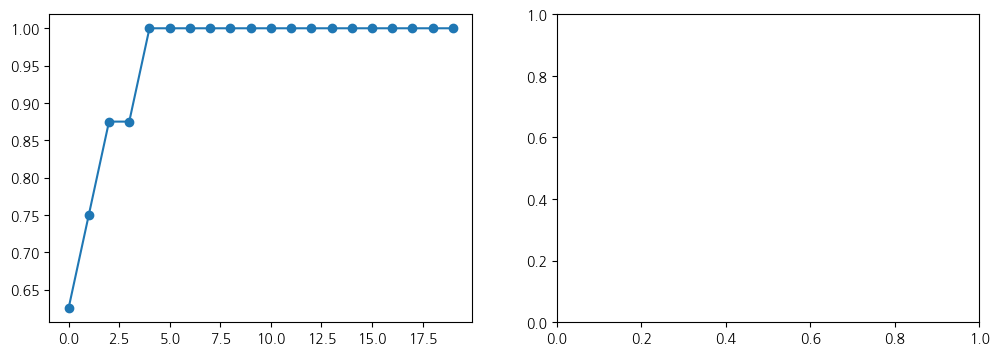

In [ ]:
# 결과 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 정확도 그래프
axes[0].plot(history.history['accuracy'], label='Train Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', marker='s')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# 손실 그래프
axes[1].plot(history.history['loss'], label='Train Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Val Loss', marker='s')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig('training_history.png', dpi=150)
plt.show()
print("그래프 저장 완료: training_history.png")

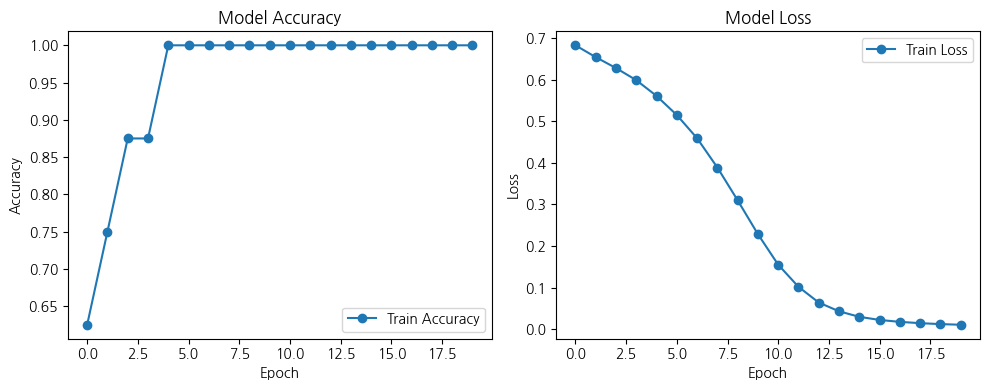

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 1) 정확도
axes[0].plot(history.history.get('accuracy', []), label='Train Accuracy', marker='o')
val_acc = history.history.get('val_accuracy') or history.history.get('val_acc')  # 둘 중 있는 것
if val_acc is not None:
    axes[0].plot(val_acc, label='Val Accuracy', marker='s')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# 2) 손실
axes[1].plot(history.history.get('loss', []), label='Train Loss', marker='o')
val_loss = history.history.get('val_loss')
if val_loss is not None:
    axes[1].plot(val_loss, label='Val Loss', marker='s')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()
